# Fortune 500 Companies Rank Analysis

## Lets first load the required packages and read the data as we have multiple files but we will still read all of them

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
fortune_1 = pd.read_csv('Fortune 500/F500_2015.csv', index_col=0)
fortune_2 = pd.read_csv('Fortune 500/F500_2016.csv', index_col=0)
fortune_3 = pd.read_csv('Fortune 500/F500_2018.csv', index_col=0)
fortune_4 = pd.read_csv('Fortune 500/F500_2020.csv', index_col=0)
fortune_500 = pd.read_csv('Fortune 500/F500_2021.csv', index_col=0)

In [3]:
fortune_1

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Description,,,,,,,,,,
Apple,159.0,121.0,103,71,56,35,17,6,5,5
Google,NaN,NaN,150,117,102,92,73,55,46,40
Amazon,NaN,NaN,171,130,100,78,56,49,35,29
Nike,163.0,158.0,153,136,124,135,136,126,115,106
Microsoft,48.0,49.0,44,35,36,38,37,35,34,31
AT&T,39.0,27.0,10,8,7,12,11,11,11,12
Berkshire Hathaway,13.0,12.0,11,13,11,7,7,5,4,4
Boeing,26.0,28.0,27,34,28,36,39,30,30,27
Coca Cola,89.0,94.0,83,73,72,70,59,57,58,63


In [4]:
fortune_1.rename(index={'Google': 'Google/Alphabet'})

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Description,,,,,,,,,,
Apple,159.0,121.0,103,71,56,35,17,6,5,5
Google/Alphabet,NaN,NaN,150,117,102,92,73,55,46,40
Amazon,NaN,NaN,171,130,100,78,56,49,35,29
Nike,163.0,158.0,153,136,124,135,136,126,115,106
Microsoft,48.0,49.0,44,35,36,38,37,35,34,31
AT&T,39.0,27.0,10,8,7,12,11,11,11,12
Berkshire Hathaway,13.0,12.0,11,13,11,7,7,5,4,4
Boeing,26.0,28.0,27,34,28,36,39,30,30,27
Coca Cola,89.0,94.0,83,73,72,70,59,57,58,63


In [5]:
fortune_2

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Description,,,,,,,,,,,
Apple,159.0,121.0,103,71,56,35,17,6,5,5,3
Google/Alphabet,NaN,NaN,150,117,102,92,73,55,46,40,36
Amazon,NaN,NaN,171,130,100,78,56,49,35,29,18
Nike,163.0,158.0,153,136,124,135,136,126,115,106,91
Microsoft,48.0,49.0,44,35,36,38,37,35,34,31,25
AT&T,39.0,27.0,10,8,7,12,11,11,11,12,10
Berkshire Hathaway,13.0,12.0,11,13,11,7,7,5,4,4,4
Boeing,26.0,28.0,27,34,28,36,39,30,30,27,24
Coca Cola,89.0,94.0,83,73,72,70,59,57,58,63,62


In [6]:
fortune_3

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Description,,,,,,,,,,,,,
Apple,159.0,121.0,103.0,71.0,56.0,35.0,17.0,6.0,5.0,5.0,3,3,4
Google/Alphabet,NaN,NaN,150.0,117.0,102.0,92.0,73.0,55.0,46.0,40.0,36,27,22
Amazon,NaN,NaN,171.0,130.0,100.0,78.0,56.0,49.0,35.0,29.0,18,12,8
Nike,163.0,158.0,153.0,136.0,124.0,135.0,136.0,126.0,115.0,106.0,91,88,89
Microsoft,48.0,49.0,44.0,35.0,36.0,38.0,37.0,35.0,34.0,31.0,25,28,30
Facebook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,157,98,76
AT&T,39.0,27.0,10.0,8.0,7.0,12.0,11.0,11.0,11.0,12.0,10,9,9
Berkshire Hathaway,13.0,12.0,11.0,13.0,11.0,7.0,7.0,5.0,4.0,4.0,4,2,3
Coca Cola,89.0,94.0,83.0,73.0,72.0,70.0,59.0,57.0,58.0,63.0,62,64,87


In [7]:
fortune_4

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Description,,,,,,,,,,,,,,,
Apple,159.0,121.0,103.0,71.0,56.0,35.0,17.0,6.0,5.0,5.0,3,3,4,3,4
Google/Alphabet,NaN,NaN,150.0,117.0,102.0,92.0,73.0,55.0,46.0,40.0,36,27,22,15,11
Amazon,NaN,NaN,171.0,130.0,100.0,78.0,56.0,49.0,35.0,29.0,18,12,8,5,2
Nike,163.0,158.0,153.0,136.0,124.0,135.0,136.0,126.0,115.0,106.0,91,88,89,90,85
Microsoft,48.0,49.0,44.0,35.0,36.0,38.0,37.0,35.0,34.0,31.0,25,28,30,26,21
Facebook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,157,98,76,57,46
AT&T,39.0,27.0,10.0,8.0,7.0,12.0,11.0,11.0,11.0,12.0,10,9,9,9,9
Berkshire Hathaway,13.0,12.0,11.0,13.0,11.0,7.0,7.0,5.0,4.0,4.0,4,2,3,4,6
Coca Cola,89.0,94.0,83.0,73.0,72.0,70.0,59.0,57.0,58.0,63.0,62,64,87,100,88


In [8]:
# Final DF
fortune_500

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Description,,,,,,,,,,,,,,,,
Apple,159.0,121.0,103.0,71.0,56.0,35.0,17.0,6.0,5.0,5.0,3,3,4,3,4,3
Google/Alphabet,NaN,NaN,150.0,117.0,102.0,92.0,73.0,55.0,46.0,40.0,36,27,22,15,11,9
Amazon,NaN,NaN,171.0,130.0,100.0,78.0,56.0,49.0,35.0,29.0,18,12,8,5,2,2
Nike,163.0,158.0,153.0,136.0,124.0,135.0,136.0,126.0,115.0,106.0,91,88,89,90,85,85
Microsoft,48.0,49.0,44.0,35.0,36.0,38.0,37.0,35.0,34.0,31.0,25,28,30,26,21,15
Facebook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,157,98,76,57,46,34
AT&T,39.0,27.0,10.0,8.0,7.0,12.0,11.0,11.0,11.0,12.0,10,9,9,9,9,11
Berkshire Hathaway,13.0,12.0,11.0,13.0,11.0,7.0,7.0,5.0,4.0,4.0,4,2,3,4,6,6
Coca Cola,89.0,94.0,83.0,73.0,72.0,70.0,59.0,57.0,58.0,63.0,62,64,87,100,88,93


## So all we needed was the last one but its okay to print all of them

## Now lets check for each of their data types especially for the last dataframe

In [9]:
print(fortune_1.dtypes)
print('-' * 80)
print(fortune_2.dtypes)
print('-' * 80)
print(fortune_3.dtypes)
print('-' * 80)
print(fortune_4.dtypes)
print('-' * 80)
print(fortune_500.dtypes)

2006    float64
2007    float64
2008      int64
2009      int64
2010      int64
2011      int64
2012      int64
2013      int64
2014      int64
2015      int64
dtype: object
--------------------------------------------------------------------------------
2006    float64
2007    float64
2008      int64
2009      int64
2010      int64
2011      int64
2012      int64
2013      int64
2014      int64
2015      int64
2016      int64
dtype: object
--------------------------------------------------------------------------------
2006    float64
2007    float64
2008    float64
2009    float64
2010    float64
2011    float64
2012    float64
2013    float64
2014    float64
2015    float64
2016      int64
2017      int64
2018      int64
dtype: object
--------------------------------------------------------------------------------
2006    float64
2007    float64
2008    float64
2009    float64
2010    float64
2011    float64
2012    float64
2013    float64
2014    float64
2015    float64
2016      i

## So as we can see we have an issue that not all of them are one single data type so we have to change all the int to float and also do some cleaning

# Data Cleaning

## Lets get rid of the NaN values and replace those NaNs with mean values instead of 0s

In [10]:
fortune_1.replace(np.nan, 0)
fortune_2.replace(np.nan, 0)
fortune_3.replace(np.nan, 0)
fortune_4.replace(np.nan, 0)
fortune_500.replace(np.nan, 0) #This is total one so this is what we are going to work with

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Description,,,,,,,,,,,,,,,,
Apple,159.0,121.0,103.0,71.0,56.0,35.0,17.0,6.0,5.0,5.0,3,3,4,3,4,3
Google/Alphabet,0.0,0.0,150.0,117.0,102.0,92.0,73.0,55.0,46.0,40.0,36,27,22,15,11,9
Amazon,0.0,0.0,171.0,130.0,100.0,78.0,56.0,49.0,35.0,29.0,18,12,8,5,2,2
Nike,163.0,158.0,153.0,136.0,124.0,135.0,136.0,126.0,115.0,106.0,91,88,89,90,85,85
Microsoft,48.0,49.0,44.0,35.0,36.0,38.0,37.0,35.0,34.0,31.0,25,28,30,26,21,15
Facebook,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,157,98,76,57,46,34
AT&T,39.0,27.0,10.0,8.0,7.0,12.0,11.0,11.0,11.0,12.0,10,9,9,9,9,11
Berkshire Hathaway,13.0,12.0,11.0,13.0,11.0,7.0,7.0,5.0,4.0,4.0,4,2,3,4,6,6
Coca Cola,89.0,94.0,83.0,73.0,72.0,70.0,59.0,57.0,58.0,63.0,62,64,87,100,88,93


In [11]:
fortune_500['2006'] = fortune_500['2006'].map( lambda x : fortune_5['2006'].mean() if x == 0 else x)

In [12]:
fortune_500

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Description,,,,,,,,,,,,,,,,
Apple,159.0,121.0,103.0,71.0,56.0,35.0,17.0,6.0,5.0,5.0,3,3,4,3,4,3
Google/Alphabet,NaN,NaN,150.0,117.0,102.0,92.0,73.0,55.0,46.0,40.0,36,27,22,15,11,9
Amazon,NaN,NaN,171.0,130.0,100.0,78.0,56.0,49.0,35.0,29.0,18,12,8,5,2,2
Nike,163.0,158.0,153.0,136.0,124.0,135.0,136.0,126.0,115.0,106.0,91,88,89,90,85,85
Microsoft,48.0,49.0,44.0,35.0,36.0,38.0,37.0,35.0,34.0,31.0,25,28,30,26,21,15
Facebook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,157,98,76,57,46,34
AT&T,39.0,27.0,10.0,8.0,7.0,12.0,11.0,11.0,11.0,12.0,10,9,9,9,9,11
Berkshire Hathaway,13.0,12.0,11.0,13.0,11.0,7.0,7.0,5.0,4.0,4.0,4,2,3,4,6,6
Coca Cola,89.0,94.0,83.0,73.0,72.0,70.0,59.0,57.0,58.0,63.0,62,64,87,100,88,93


In [13]:
mean_value1 = fortune_500['2006'].mean()
fortune_500['2006'].fillna(value=mean_value1, inplace=True)

mean_value2 = fortune_500['2007'].mean()
fortune_500['2007'].fillna(value=mean_value2, inplace=True)

mean_value3 = fortune_500['2008'].mean()
fortune_500['2008'].fillna(value=mean_value3, inplace=True)

mean_value4 = fortune_500['2009'].mean()
fortune_500['2009'].fillna(value=mean_value4, inplace=True)

mean_value5 = fortune_500['2010'].mean()
fortune_500['2010'].fillna(value=mean_value5, inplace=True)

mean_value6 = fortune_500['2011'].mean()
fortune_500['2011'].fillna(value=mean_value6, inplace=True)

mean_value7 = fortune_500['2012'].mean()
fortune_500['2012'].fillna(value=mean_value7, inplace=True)

mean_value8 = fortune_500['2013'].mean()
fortune_500['2013'].fillna(value=mean_value8, inplace=True)

mean_value9 = fortune_500['2014'].mean()
fortune_500['2014'].fillna(value=mean_value9, inplace=True)

mean_value10 = fortune_500['2015'].mean()
fortune_500['2015'].fillna(value=mean_value10, inplace=True)

In [14]:
fortune_500

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Description,,,,,,,,,,,,,,,,
Apple,159.000000,121.000000,103.000000,71.000000,56.000000,35.000000,17.000000,6.000000,5.000000,5.000000,3,3,4,3,4,3
Google/Alphabet,76.714286,69.857143,150.000000,117.000000,102.000000,92.000000,73.000000,55.000000,46.000000,40.000000,36,27,22,15,11,9
Amazon,76.714286,69.857143,171.000000,130.000000,100.000000,78.000000,56.000000,49.000000,35.000000,29.000000,18,12,8,5,2,2
Nike,163.000000,158.000000,153.000000,136.000000,124.000000,135.000000,136.000000,126.000000,115.000000,106.000000,91,88,89,90,85,85
Microsoft,48.000000,49.000000,44.000000,35.000000,36.000000,38.000000,37.000000,35.000000,34.000000,31.000000,25,28,30,26,21,15
Facebook,76.714286,69.857143,83.555556,68.555556,59.555556,55.888889,48.333333,41.555556,37.555556,35.222222,157,98,76,57,46,34
AT&T,39.000000,27.000000,10.000000,8.000000,7.000000,12.000000,11.000000,11.000000,11.000000,12.000000,10,9,9,9,9,11
Berkshire Hathaway,13.000000,12.000000,11.000000,13.000000,11.000000,7.000000,7.000000,5.000000,4.000000,4.000000,4,2,3,4,6,6
Coca Cola,89.000000,94.000000,83.000000,73.000000,72.000000,70.000000,59.000000,57.000000,58.000000,63.000000,62,64,87,100,88,93


## So now that we converted all the NaN values with the mean values, let us now covert the data types especially convert all the ints to floats so that we have a total uniform data types for each columns

In [15]:
fortune_500['2016'] = fortune_500['2016'].astype(float)
fortune_500['2017'] = fortune_500['2017'].astype(float)
fortune_500['2018'] = fortune_500['2018'].astype(float)
fortune_500['2019'] = fortune_500['2019'].astype(float)
fortune_500['2020'] = fortune_500['2020'].astype(float)
fortune_500['2021'] = fortune_500['2021'].astype(float)

In [16]:
fortune_500

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Description,,,,,,,,,,,,,,,,
Apple,159.000000,121.000000,103.000000,71.000000,56.000000,35.000000,17.000000,6.000000,5.000000,5.000000,3.0,3.0,4.0,3.0,4.0,3.0
Google/Alphabet,76.714286,69.857143,150.000000,117.000000,102.000000,92.000000,73.000000,55.000000,46.000000,40.000000,36.0,27.0,22.0,15.0,11.0,9.0
Amazon,76.714286,69.857143,171.000000,130.000000,100.000000,78.000000,56.000000,49.000000,35.000000,29.000000,18.0,12.0,8.0,5.0,2.0,2.0
Nike,163.000000,158.000000,153.000000,136.000000,124.000000,135.000000,136.000000,126.000000,115.000000,106.000000,91.0,88.0,89.0,90.0,85.0,85.0
Microsoft,48.000000,49.000000,44.000000,35.000000,36.000000,38.000000,37.000000,35.000000,34.000000,31.000000,25.0,28.0,30.0,26.0,21.0,15.0
Facebook,76.714286,69.857143,83.555556,68.555556,59.555556,55.888889,48.333333,41.555556,37.555556,35.222222,157.0,98.0,76.0,57.0,46.0,34.0
AT&T,39.000000,27.000000,10.000000,8.000000,7.000000,12.000000,11.000000,11.000000,11.000000,12.000000,10.0,9.0,9.0,9.0,9.0,11.0
Berkshire Hathaway,13.000000,12.000000,11.000000,13.000000,11.000000,7.000000,7.000000,5.000000,4.000000,4.000000,4.0,2.0,3.0,4.0,6.0,6.0
Coca Cola,89.000000,94.000000,83.000000,73.000000,72.000000,70.000000,59.000000,57.000000,58.000000,63.000000,62.0,64.0,87.0,100.0,88.0,93.0


In [17]:
fortune_500.copy()

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Description,,,,,,,,,,,,,,,,
Apple,159.000000,121.000000,103.000000,71.000000,56.000000,35.000000,17.000000,6.000000,5.000000,5.000000,3.0,3.0,4.0,3.0,4.0,3.0
Google/Alphabet,76.714286,69.857143,150.000000,117.000000,102.000000,92.000000,73.000000,55.000000,46.000000,40.000000,36.0,27.0,22.0,15.0,11.0,9.0
Amazon,76.714286,69.857143,171.000000,130.000000,100.000000,78.000000,56.000000,49.000000,35.000000,29.000000,18.0,12.0,8.0,5.0,2.0,2.0
Nike,163.000000,158.000000,153.000000,136.000000,124.000000,135.000000,136.000000,126.000000,115.000000,106.000000,91.0,88.0,89.0,90.0,85.0,85.0
Microsoft,48.000000,49.000000,44.000000,35.000000,36.000000,38.000000,37.000000,35.000000,34.000000,31.000000,25.0,28.0,30.0,26.0,21.0,15.0
Facebook,76.714286,69.857143,83.555556,68.555556,59.555556,55.888889,48.333333,41.555556,37.555556,35.222222,157.0,98.0,76.0,57.0,46.0,34.0
AT&T,39.000000,27.000000,10.000000,8.000000,7.000000,12.000000,11.000000,11.000000,11.000000,12.000000,10.0,9.0,9.0,9.0,9.0,11.0
Berkshire Hathaway,13.000000,12.000000,11.000000,13.000000,11.000000,7.000000,7.000000,5.000000,4.000000,4.000000,4.0,2.0,3.0,4.0,6.0,6.0
Coca Cola,89.000000,94.000000,83.000000,73.000000,72.000000,70.000000,59.000000,57.000000,58.000000,63.000000,62.0,64.0,87.0,100.0,88.0,93.0


In [18]:
fortune_500.describe()

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,76.714286,69.857143,83.555556,68.555556,59.555556,55.888889,48.333333,41.555556,37.555556,35.222222,43.000000,35.500000,35.500000,33.700000,31.200000,31.200000
std,50.821505,45.140346,60.277343,46.868874,40.039178,39.042554,37.662242,35.459245,32.410942,30.469576,48.568394,35.227041,34.875174,36.221694,32.744126,34.460283
min,13.000000,12.000000,10.000000,8.000000,7.000000,7.000000,7.000000,5.000000,4.000000,4.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000
25%,41.250000,33.250000,31.250000,34.250000,30.000000,35.250000,22.000000,15.750000,15.750000,15.750000,12.000000,9.750000,8.250000,6.000000,6.750000,6.750000
50%,76.714286,69.857143,83.277778,69.777778,57.777778,46.944444,43.666667,38.277778,34.500000,30.000000,24.500000,25.500000,24.500000,20.500000,16.000000,13.000000
75%,85.928571,87.964286,138.250000,106.000000,93.000000,76.000000,58.250000,53.500000,43.888889,38.805556,55.500000,55.000000,64.500000,49.750000,44.500000,49.000000
max,163.000000,158.000000,171.000000,136.000000,124.000000,135.000000,136.000000,126.000000,115.000000,106.000000,157.000000,98.000000,89.000000,100.000000,88.000000,93.000000


### Now, in order to analyze such ranking, we can set a parameter for each ranks so that it gets easier to analyze them .

### We cannot just analyze it like it is now because, python will recognize the values as just simple values and not as ranks hence if we plot numbers like 130 or 20 python will recognize 20 as least and 130 as highest which in this case will be wrong because 130 is the rank which is least and 20 is the highest rank

### That is why setting up paramets is our first priority

**I have set this parameter before hand so you can get an idea what i am trying to do**

## Paramter:

### Average rank if 1-20, points = 1000
### Average rank if 21-40, points = 700
### Average rank if 41-60, points = 500
### Average rank if 61-80, points = 300
### Average rank if 81 above, points = 100

### So now we will create two new columns where the first column 'Average_points' is actually the average ranks (sum of all ranks / no.of ranks) and the next column 'Point_system' will indicate the points based on the 'Average_points' column.

### *This is my assumption of a parameter, however you can set your own parameter if you would like*

In [44]:
new_fortune_500['Average_rank'] = (fortune_500['2006'] + fortune_500['2007'] + fortune_500['2008'] + fortune_500['2009'] 
                                   + fortune_500['2010'] +fortune_500['2011'] + fortune_500['2012'] + fortune_500['2013']
                                   + fortune_500['2014'] + fortune_500['2015'] + fortune_500['2016'] + fortune_500['2017']
                                   + fortune_500['2018'] + fortune_500['2019'] + fortune_500['2020'] + fortune_500['2021']) / 16

In [45]:
new_fortune_500

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Average_rank
Description,,,,,,,,,,,,,,,,,
Apple,159.000000,121.000000,103.000000,71.000000,56.000000,35.000000,17.000000,6.000000,5.000000,5.000000,3.0,3.0,4.0,3.0,4.0,3.0,37.375000
Google/Alphabet,76.714286,69.857143,150.000000,117.000000,102.000000,92.000000,73.000000,55.000000,46.000000,40.000000,36.0,27.0,22.0,15.0,11.0,9.0,58.848214
Amazon,76.714286,69.857143,171.000000,130.000000,100.000000,78.000000,56.000000,49.000000,35.000000,29.000000,18.0,12.0,8.0,5.0,2.0,2.0,52.598214
Nike,163.000000,158.000000,153.000000,136.000000,124.000000,135.000000,136.000000,126.000000,115.000000,106.000000,91.0,88.0,89.0,90.0,85.0,85.0,117.500000
Microsoft,48.000000,49.000000,44.000000,35.000000,36.000000,38.000000,37.000000,35.000000,34.000000,31.000000,25.0,28.0,30.0,26.0,21.0,15.0,33.250000
Facebook,76.714286,69.857143,83.555556,68.555556,59.555556,55.888889,48.333333,41.555556,37.555556,35.222222,157.0,98.0,76.0,57.0,46.0,34.0,65.299603
AT&T,39.000000,27.000000,10.000000,8.000000,7.000000,12.000000,11.000000,11.000000,11.000000,12.000000,10.0,9.0,9.0,9.0,9.0,11.0,12.812500
Berkshire Hathaway,13.000000,12.000000,11.000000,13.000000,11.000000,7.000000,7.000000,5.000000,4.000000,4.000000,4.0,2.0,3.0,4.0,6.0,6.0,7.000000
Coca Cola,89.000000,94.000000,83.000000,73.000000,72.000000,70.000000,59.000000,57.000000,58.000000,63.000000,62.0,64.0,87.0,100.0,88.0,93.0,75.750000


In [51]:
condition_1 = (new_fortune_500['Average_rank'] > 1) & (new_fortune_500['Average_rank'] < 20)
condition_2 = (new_fortune_500['Average_rank'] > 21) & (new_fortune_500['Average_rank'] < 40)
condition_3 = (new_fortune_500['Average_rank'] > 41) & (new_fortune_500['Average_rank'] < 60)
condition_4 = (new_fortune_500['Average_rank'] > 61) & (new_fortune_500['Average_rank'] < 80)
condition_5 = (new_fortune_500['Average_rank'] > 81)
conditions = [condition_1, condition_2, condition_3, condition_4, condition_5]
points = [1000, 700, 500, 300, 100]

In [52]:
new_fortune_500['Point_system'] = np.select(conditions, points, default="")

In [53]:
new_fortune_500

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Average_rank,Point_system
Description,,,,,,,,,,,,,,,,,,
Apple,159.000000,121.000000,103.000000,71.000000,56.000000,35.000000,17.000000,6.000000,5.000000,5.000000,3.0,3.0,4.0,3.0,4.0,3.0,37.375000,700
Google/Alphabet,76.714286,69.857143,150.000000,117.000000,102.000000,92.000000,73.000000,55.000000,46.000000,40.000000,36.0,27.0,22.0,15.0,11.0,9.0,58.848214,500
Amazon,76.714286,69.857143,171.000000,130.000000,100.000000,78.000000,56.000000,49.000000,35.000000,29.000000,18.0,12.0,8.0,5.0,2.0,2.0,52.598214,500
Nike,163.000000,158.000000,153.000000,136.000000,124.000000,135.000000,136.000000,126.000000,115.000000,106.000000,91.0,88.0,89.0,90.0,85.0,85.0,117.500000,100
Microsoft,48.000000,49.000000,44.000000,35.000000,36.000000,38.000000,37.000000,35.000000,34.000000,31.000000,25.0,28.0,30.0,26.0,21.0,15.0,33.250000,700
Facebook,76.714286,69.857143,83.555556,68.555556,59.555556,55.888889,48.333333,41.555556,37.555556,35.222222,157.0,98.0,76.0,57.0,46.0,34.0,65.299603,300
AT&T,39.000000,27.000000,10.000000,8.000000,7.000000,12.000000,11.000000,11.000000,11.000000,12.000000,10.0,9.0,9.0,9.0,9.0,11.0,12.812500,1000
Berkshire Hathaway,13.000000,12.000000,11.000000,13.000000,11.000000,7.000000,7.000000,5.000000,4.000000,4.000000,4.0,2.0,3.0,4.0,6.0,6.0,7.000000,1000
Coca Cola,89.000000,94.000000,83.000000,73.000000,72.000000,70.000000,59.000000,57.000000,58.000000,63.000000,62.0,64.0,87.0,100.0,88.0,93.0,75.750000,300


### So as you can see how this has all taken place. For being on the  safe side we will check if those two new columns are in float or not. If not, we have to convert them to float again.

In [54]:
new_fortune_500.dtypes

2006            float64
2007            float64
2008            float64
2009            float64
2010            float64
2011            float64
2012            float64
2013            float64
2014            float64
2015            float64
2016            float64
2017            float64
2018            float64
2019            float64
2020            float64
2021            float64
Average_rank    float64
Point_system     object
dtype: object

In [55]:
new_fortune_500['Point_system'] = new_fortune_500['Point_system'].astype(float)

In [56]:
new_fortune_500.dtypes

2006            float64
2007            float64
2008            float64
2009            float64
2010            float64
2011            float64
2012            float64
2013            float64
2014            float64
2015            float64
2016            float64
2017            float64
2018            float64
2019            float64
2020            float64
2021            float64
Average_rank    float64
Point_system    float64
dtype: object

In [57]:
new_fortune_500

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Average_rank,Point_system
Description,,,,,,,,,,,,,,,,,,
Apple,159.000000,121.000000,103.000000,71.000000,56.000000,35.000000,17.000000,6.000000,5.000000,5.000000,3.0,3.0,4.0,3.0,4.0,3.0,37.375000,700.0
Google/Alphabet,76.714286,69.857143,150.000000,117.000000,102.000000,92.000000,73.000000,55.000000,46.000000,40.000000,36.0,27.0,22.0,15.0,11.0,9.0,58.848214,500.0
Amazon,76.714286,69.857143,171.000000,130.000000,100.000000,78.000000,56.000000,49.000000,35.000000,29.000000,18.0,12.0,8.0,5.0,2.0,2.0,52.598214,500.0
Nike,163.000000,158.000000,153.000000,136.000000,124.000000,135.000000,136.000000,126.000000,115.000000,106.000000,91.0,88.0,89.0,90.0,85.0,85.0,117.500000,100.0
Microsoft,48.000000,49.000000,44.000000,35.000000,36.000000,38.000000,37.000000,35.000000,34.000000,31.000000,25.0,28.0,30.0,26.0,21.0,15.0,33.250000,700.0
Facebook,76.714286,69.857143,83.555556,68.555556,59.555556,55.888889,48.333333,41.555556,37.555556,35.222222,157.0,98.0,76.0,57.0,46.0,34.0,65.299603,300.0
AT&T,39.000000,27.000000,10.000000,8.000000,7.000000,12.000000,11.000000,11.000000,11.000000,12.000000,10.0,9.0,9.0,9.0,9.0,11.0,12.812500,1000.0
Berkshire Hathaway,13.000000,12.000000,11.000000,13.000000,11.000000,7.000000,7.000000,5.000000,4.000000,4.000000,4.0,2.0,3.0,4.0,6.0,6.0,7.000000,1000.0
Coca Cola,89.000000,94.000000,83.000000,73.000000,72.000000,70.000000,59.000000,57.000000,58.000000,63.000000,62.0,64.0,87.0,100.0,88.0,93.0,75.750000,300.0


## ........................................................................

## ..................................................................................................................................

# Linear Regression for accuracy

## This was optional to see if my workings are correct or not. If you want you can do this but if not then also its fine.

In [59]:
train = new_fortune_500.drop(['Average_rank','Point_system'], axis=1)
test = new_fortune_500['Average_rank']

X_train, X_test, y_train, y_test =  train_test_split(train, test, train_size=0.8, test_size=0.2, random_state=0)

In [61]:
regr = LinearRegression()

In [62]:
regr.fit(X_train, y_train)

LinearRegression()

In [63]:
pred = regr.predict(X_test)
pred

array([52.53050845, 75.37548772])

In [64]:
regr.score(X_test, y_test)

0.9994595442974287

## So our data is 99.94% correct so thats good. If we would have taken into account the MAE this can go down to 94 or 93 but thats still okay 

## .....................................................................................................................

## ...................................................................................................................................

# EDA (Explaratory Data Analysis)

## Here we will see some descriptive statistics and answer the question which year and which company did the best to improve their ranks

In [115]:
standard_dev = fortune_500.std(axis=1)
standard_dev

Description
Apple                 50.349280
Google/Alphabet       41.164957
Amazon                49.593647
Nike                  27.650196
Microsoft              9.233995
Facebook              30.720589
AT&T                   8.296335
Berkshire Hathaway     3.759433
Coca Cola             14.640128
Boeing                 7.770671
dtype: float64

### Okay so what does Standard deviation usually tell us, that the less the value of standard deviation the better is the consistency which is in the case of performance, attendance or maybe stock prices and the more the value of the standard deviation the more noisy or bad the performance is.


### But we will follow the opposite here as we are taking into consideration the rankings so the highest std has the best performance and why is that. Its because that company jumped from a bad rank to an extremely good rank and that is why their std must be high.

### In this case we see 'Apple' is having highest STD which means it had the best performance and if we can look into the data, we will see that it started from Rank 189 and now its at Rank 3 so thats a big jump.
### Followed by Amazon and then Google.

### The worst perfomance was shown by Berkshire hathaway and if we can look into their data we will see a minimal jump from Rank 13 to 11 and then 12 so it has been a slow rank up for them but they were consistent.

In [68]:
new_fortune_500.describe()

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Average_rank,Point_system
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,76.714286,69.857143,83.555556,68.555556,59.555556,55.888889,48.333333,41.555556,37.555556,35.222222,43.000000,35.500000,35.500000,33.700000,31.200000,31.200000,49.180853,580.000000
std,50.821505,45.140346,60.277343,46.868874,40.039178,39.042554,37.662242,35.459245,32.410942,30.469576,48.568394,35.227041,34.875174,36.221694,32.744126,34.460283,32.575512,297.396107
min,13.000000,12.000000,10.000000,8.000000,7.000000,7.000000,7.000000,5.000000,4.000000,4.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,7.000000,100.000000
25%,41.250000,33.250000,31.250000,34.250000,30.000000,35.250000,22.000000,15.750000,15.750000,15.750000,12.000000,9.750000,8.250000,6.000000,6.750000,6.750000,31.843750,350.000000
50%,76.714286,69.857143,83.277778,69.777778,57.777778,46.944444,43.666667,38.277778,34.500000,30.000000,24.500000,25.500000,24.500000,20.500000,16.000000,13.000000,44.986607,600.000000
75%,85.928571,87.964286,138.250000,106.000000,93.000000,76.000000,58.250000,53.500000,43.888889,38.805556,55.500000,55.000000,64.500000,49.750000,44.500000,49.000000,63.686756,700.000000
max,163.000000,158.000000,171.000000,136.000000,124.000000,135.000000,136.000000,126.000000,115.000000,106.000000,157.000000,98.000000,89.000000,100.000000,88.000000,93.000000,117.500000,1000.000000


### In terms of year, we can see that the year 2008 has seen the best perfomance jump in ranks whereas the year 2015 was slow paced and bad followed by 2014 and then 2020

### **(Take a note that this is only the top fortune 500 companies if we take into account all the companies, we will see 2020 being the worst year for ranking which is not the case here)

In [114]:
my_corr = new_fortune_500.corr()

In [67]:
my_corr

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Average_rank,Point_system
2006,1.000000,0.975193,0.688641,0.681735,0.697481,0.648072,0.578031,0.542958,0.531512,0.528455,0.283304,0.380961,0.395955,0.391143,0.359972,0.301822,0.716083,-0.640419
2007,0.975193,1.000000,0.720526,0.742229,0.779071,0.766670,0.718964,0.697121,0.692979,0.694536,0.379356,0.514633,0.552957,0.555137,0.524414,0.464226,0.841469,-0.767723
2008,0.688641,0.720526,1.000000,0.986669,0.960413,0.850812,0.709847,0.650910,0.570286,0.525777,0.263295,0.298538,0.252542,0.209792,0.149025,0.095779,0.725096,-0.719340
2009,0.681735,0.742229,0.986669,1.000000,0.988508,0.917884,0.806294,0.754557,0.683112,0.641025,0.330663,0.393502,0.360613,0.323872,0.276874,0.230018,0.805679,-0.789617
2010,0.697481,0.779071,0.960413,0.988508,1.000000,0.959874,0.868082,0.824257,0.767441,0.734157,0.389409,0.480632,0.468197,0.437419,0.388597,0.335046,0.870674,-0.844991
2011,0.648072,0.766670,0.850812,0.917884,0.959874,1.000000,0.970867,0.944363,0.909990,0.881916,0.477574,0.611686,0.615364,0.589904,0.561855,0.514082,0.939019,-0.886019
2012,0.578031,0.718964,0.709847,0.806294,0.868082,0.970867,1.000000,0.990437,0.974451,0.948912,0.517836,0.678472,0.690026,0.668990,0.662795,0.621055,0.937823,-0.862387
2013,0.542958,0.697121,0.650910,0.754557,0.824257,0.944363,0.990437,1.000000,0.991571,0.974088,0.532932,0.707716,0.734872,0.723337,0.714202,0.669753,0.934797,-0.855088
2014,0.531512,0.692979,0.570286,0.683112,0.767441,0.909990,0.974451,0.991571,1.000000,0.993582,0.550939,0.743136,0.791897,0.790611,0.787551,0.746374,0.932806,-0.851361
2015,0.528455,0.694536,0.525777,0.641025,0.734157,0.881916,0.948912,0.974088,0.993582,1.000000,0.561040,0.764260,0.836393,0.848065,0.842593,0.803100,0.932540,-0.853697


<AxesSubplot:>

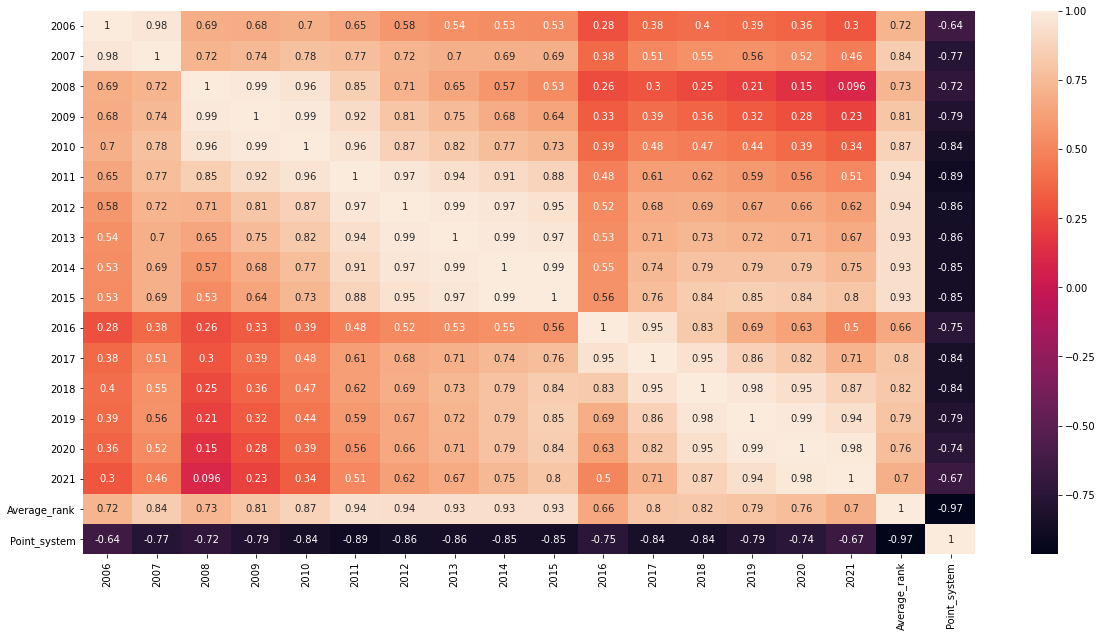

In [70]:
plt.figure(figsize=(20,10))
sns.heatmap(data=my_corr, annot=True)

## .........................................................................................................................................

## .........................................................................................................................................

# Data Visualization

## Okay now its time we visualize some data.

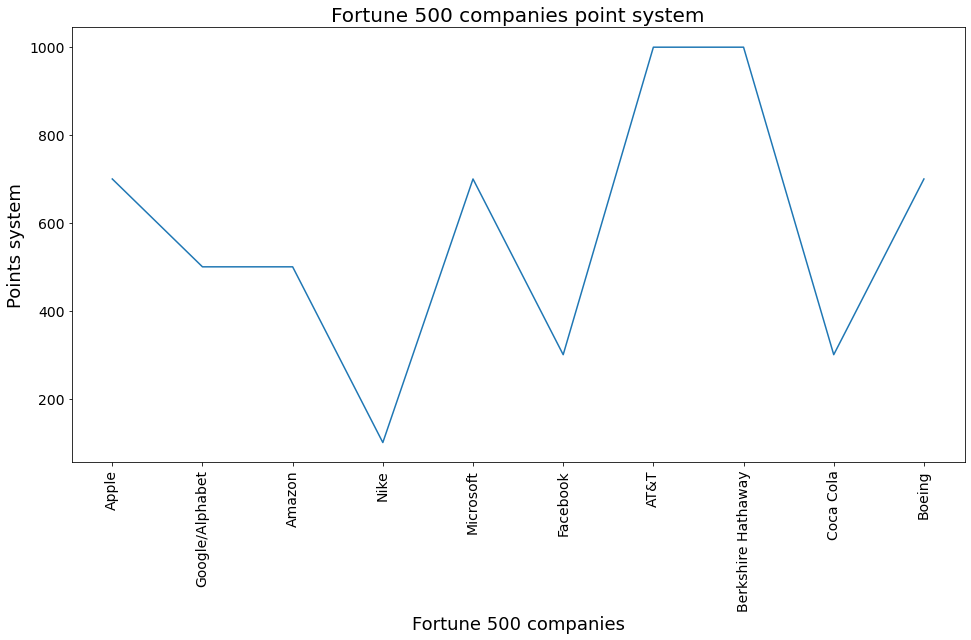

In [77]:
plt.figure(figsize=(16,8))
x = new_fortune_500.index
y = new_fortune_500['Point_system']
plt.title('Fortune 500 companies point system', size=20)
plt.xticks(rotation = 'vertical', size=14)
plt.yticks(size=14)
plt.xlabel('Fortune 500 companies', size=18)
plt.ylabel('Points system', size=18)
plt.plot(x,y)
plt.show()

## Now based on the points system we created, we can see that At&t and berkshire hathaway has been the best company in terms of total rank score whereas nike has been really bad majority of which goes into 2020 (Because no one wants to buy shoes at times when we were facing food shortages)

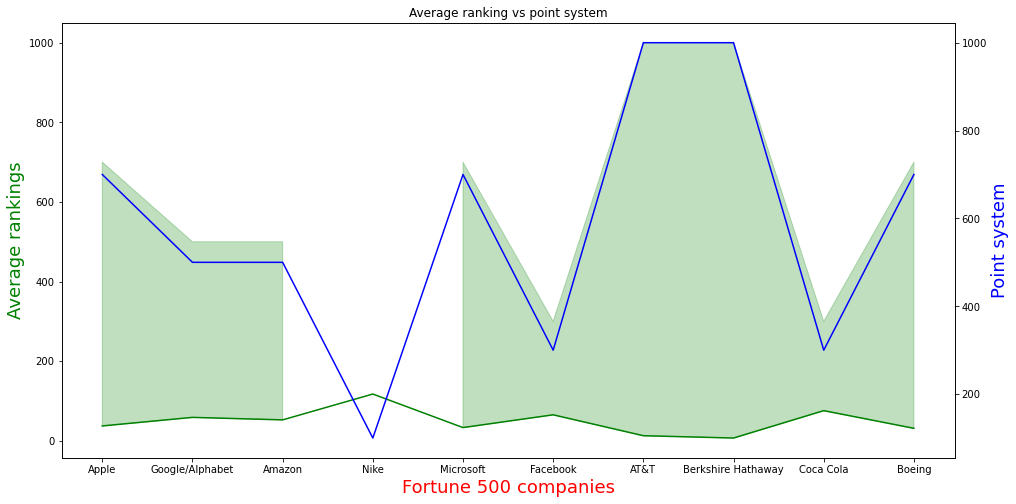

In [87]:
x = new_fortune_500.index
 
y1 = new_fortune_500['Average_rank']
y2 = new_fortune_500['Point_system']
 
# plotting figures by creating aexs object
# using subplots() function
fig, ax = plt.subplots(figsize = (16, 8))
plt.title('Average ranking vs point system')
 
ax2 = ax.twinx()
ax.plot(x, y1, color = 'g')
ax2.plot(x, y2, color = 'b')

ax.set_xlabel('Fortune 500 companies', color = 'r', size=18)
ax.set_ylabel('Average rankings', color = 'g', size=18)
ax2.set_ylabel('Point system', color = 'b', size=18)

ax.fill_between(
    x, y1, y2, where=(y1 < y2), 
    interpolate=False, color="green", alpha=0.25
)
plt.show()

## If we can compare, then we can see that despite having a lower average ranking, At&t and berkshire hathway has a better rank score which is the oppoiste for nike.

## Now lets look at the top 5 fortune 500 companies that did really well.

In [91]:
fortune_500_tops = new_fortune_500.sort_values(by = 'Point_system', ascending=False)
fortune_500_tops

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Average_rank,Point_system
Description,,,,,,,,,,,,,,,,,,
AT&T,39.000000,27.000000,10.000000,8.000000,7.000000,12.000000,11.000000,11.000000,11.000000,12.000000,10.0,9.0,9.0,9.0,9.0,11.0,12.812500,1000.0
Berkshire Hathaway,13.000000,12.000000,11.000000,13.000000,11.000000,7.000000,7.000000,5.000000,4.000000,4.000000,4.0,2.0,3.0,4.0,6.0,6.0,7.000000,1000.0
Apple,159.000000,121.000000,103.000000,71.000000,56.000000,35.000000,17.000000,6.000000,5.000000,5.000000,3.0,3.0,4.0,3.0,4.0,3.0,37.375000,700.0
Microsoft,48.000000,49.000000,44.000000,35.000000,36.000000,38.000000,37.000000,35.000000,34.000000,31.000000,25.0,28.0,30.0,26.0,21.0,15.0,33.250000,700.0
Boeing,26.000000,28.000000,27.000000,34.000000,28.000000,36.000000,39.000000,30.000000,30.000000,27.000000,24.0,24.0,27.0,28.0,40.0,54.0,31.375000,700.0
Google/Alphabet,76.714286,69.857143,150.000000,117.000000,102.000000,92.000000,73.000000,55.000000,46.000000,40.000000,36.0,27.0,22.0,15.0,11.0,9.0,58.848214,500.0
Amazon,76.714286,69.857143,171.000000,130.000000,100.000000,78.000000,56.000000,49.000000,35.000000,29.000000,18.0,12.0,8.0,5.0,2.0,2.0,52.598214,500.0
Facebook,76.714286,69.857143,83.555556,68.555556,59.555556,55.888889,48.333333,41.555556,37.555556,35.222222,157.0,98.0,76.0,57.0,46.0,34.0,65.299603,300.0
Coca Cola,89.000000,94.000000,83.000000,73.000000,72.000000,70.000000,59.000000,57.000000,58.000000,63.000000,62.0,64.0,87.0,100.0,88.0,93.0,75.750000,300.0


In [108]:
top_5 = fortune_500_tops['Point_system']
top_5_names = fortune_500_tops.index

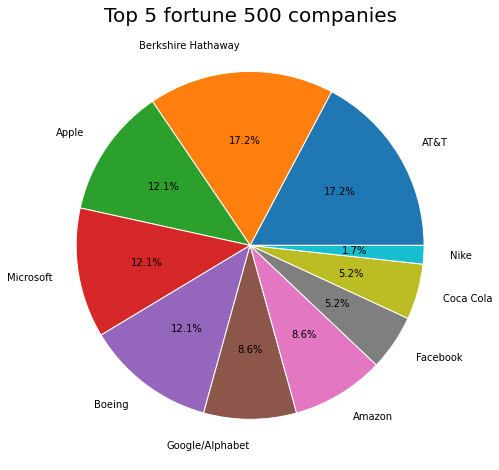

In [110]:
plt.figure(figsize=(16,8))
plt.pie(top_5, labels=top_5_names, labeldistance=1.15, autopct='%.1f%%', 
        wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' })
plt.title('Top 5 fortune 500 companies', size=20)
plt.show()

## So the top 5 fortune 500 companies are

## 1. Berkshire hathaway
## 2. AT&T
## 3. Apple
## 4. Microsoft
## 5. Boeing.

### and there is a proper reason for that. 

## Reasons:
### 1. After 2019 investment became a fortune for everyone because we needed money and berkshire hathway was the best place to start.

### 2. When everything became online, people relied too much on telecom services and online products and thats when At&t came in and bought good offers for people to use and microsoft delivered Xbox games for the gamers to stay in and play.

### 3. Travelling was vital because people wanted to go home and thats where boeing comes in to provide transportation even before covid.

### 4. Apple brings new products every year that attracts customers all the time and hence we saw that they have the best performance.

## But wait, why not google, facebook are in top 5. Lets go over the reasons then.

## Reasons:

### 1. Both google and facebook being the best IT industry are not in top 5 because both of them faced lawsuits after lawsuits for selling peoples data and we have seen what happened as it went public. Google however. despite providing meet and classroom facility for online classes, had series of bugs and glicthes and hence they became a problem.

### 2. Amazon may had big amount of sales and revenues and everything, but their working conditions are bad internally and thats why they have the highest attrition rate for both employees and labours who are working there. So if internal problem arises, it creates a big impact on the companies ranking.

### 3. Coca cola eventhough it provides so many food products couldnt be in top 5 because they had a supply chain management problem where orders were being mistakenly displaced and delayed and just because of this small problem they couldnt be in top 5.

